## Изучение воздействия шкалирования

In [1]:
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics, preprocessing

In [2]:
file_path = os.path.join('..', 'data.txt')

In [3]:
def import_data(file_path):
    try:
        df = pd.read_csv(file_path, delimiter=';', encoding='utf-8', na_values=['None'])
        print(f"Импорт данных успешный")
        return df
    except FileNotFoundError:
        print(f"Файл '{file_path}' не найден.")
        return None
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return None

In [4]:
df = import_data(file_path)   
if df is not None:
    print(df.keys().tolist())

Импорт данных успешный
['ID', 'name', 'type', 'profit', 'risk', 'effect', 'share_holder', 'min_contrib']


In [5]:
display(df)

,ID,name,type,profit,risk,effect,share_holder,min_contrib
0,11,АК БАРС - Консервативный,Открытый,6.22,1.035,-0.120,265,1000
1,2,Активо два,Закрытый,12.45,0.190,0.330,275,100000
2,3,Активо двенадцать,Закрытый,3.52,-0.007,0.482,142,300000
3,4,Активо один,Закрытый,0.38,0.776,0.046,80,10000000
4,5,Активо пять,Закрытый,1.77,1.084,0.007,141,300000
5,12,Альтернативный процент,Открытый,-2.54,0.042,-0.117,1,50000
6,6,Альфа-Капитал Видеоигры,Биржевой,81.40,0.699,0.001,6976,1000
7,7,Альфа-Капитал Космос,Биржевой,2.93,1.002,0.132,6887,1000
8,8,Альфа-Капитал Медицина,Биржевой,NaN,1.002,0.206,10994,1000
9,9,Альфа-Капитал Стратегия будущего,Биржевой,NaN,0.579,0.181,5614,1000


Работа с данными

In [6]:
df.shape

(33, 8)

In [7]:
df.isna().sum()

ID              0
name            0
type            0
profit          4
risk            0
effect          0
share_holder    0
min_contrib     0
dtype: int64

In [8]:
new_df = pd.DataFrame()
new_df['Поля'] = df.columns
new_df['Тип данных'] = df.dtypes.values

scales = list()
for col in df:
    scales.append(len(df[col].unique()))
new_df['Уникальных значений'] = scales

new_df

,Поля,Тип данных,Уникальных значений
0,ID,int64,33
1,name,object,33
2,type,object,3
3,profit,float64,30
4,risk,float64,31
5,effect,float64,31
6,share_holder,int64,28
7,min_contrib,int64,8


Визуализация

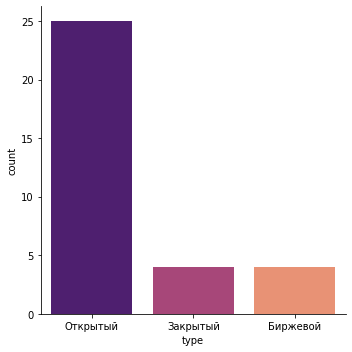

In [9]:
sb.catplot(x='type', data=df, kind='count', palette='magma')

<AxesSubplot:xlabel='profit', ylabel='Count'>

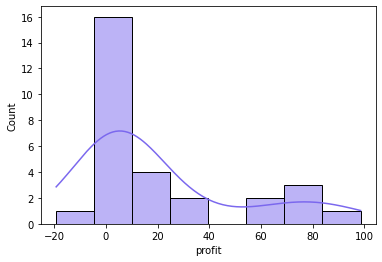

In [10]:
sb.histplot(df['profit'], kde=True, color='mediumslateblue')

<AxesSubplot:xlabel='risk', ylabel='Count'>

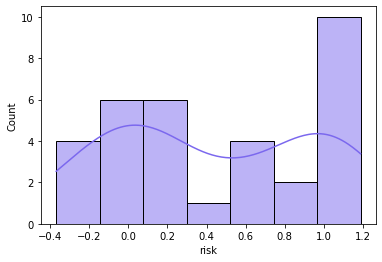

In [11]:
sb.histplot(df['risk'], kde = True, color='mediumslateblue') 

<AxesSubplot:xlabel='effect', ylabel='Count'>

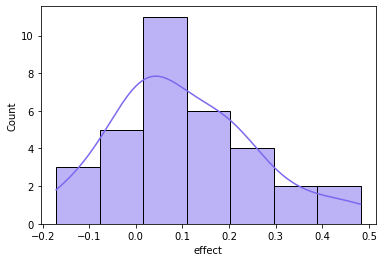

In [12]:
sb.histplot(df['effect'], kde = True, color='mediumslateblue') 

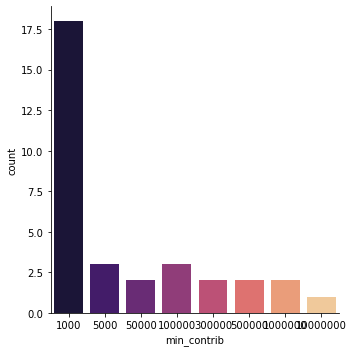

In [13]:
sb.catplot(x='min_contrib', data=df, kind='count', palette='magma')

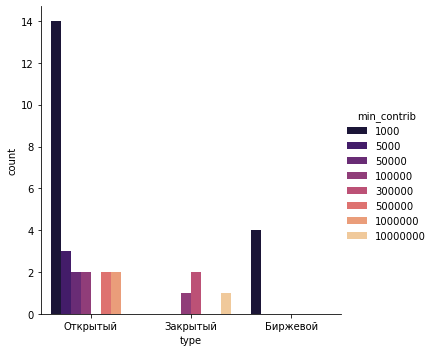

In [14]:
sb.catplot(x = 'type', hue ='min_contrib', data = df, kind = 'count', palette='magma')

In [15]:
df.groupby('type').mean() #средние значения по типу

,ID,profit,risk,effect,share_holder,min_contrib
type,,,,,,
Биржевой,7.5,42.165,0.82050,0.13000,7617.75,1000.0
Закрытый,3.5,4.530,0.51075,0.21625,159.50,2675000.0
Открытый,22.0,22.200,0.36068,0.08252,146.08,133160.0


<AxesSubplot:>

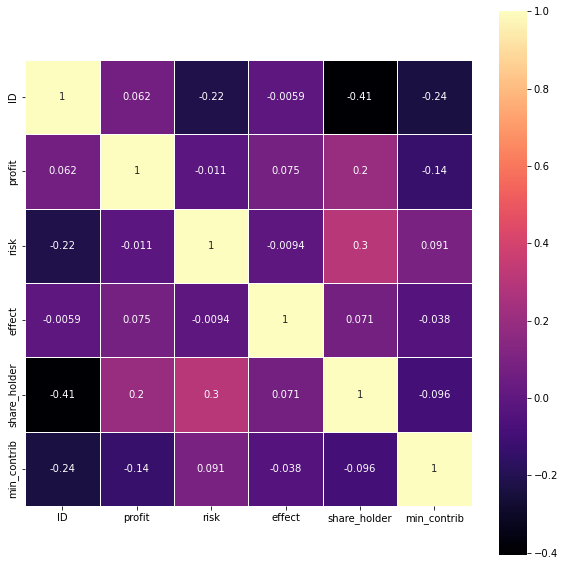

In [16]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), square = True, annot=True, linewidth=0.5, cmap='magma')

Предобработка

In [17]:
df_copy = df.copy()
df_copy.shape
df.shape

(33, 8)

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

ID              0
name            0
type            0
profit          0
risk            0
effect          0
share_holder    0
min_contrib     0
dtype: int64

In [20]:
df.shape

(29, 8)

In [21]:
df.loc[df['type'] == 'Открытый', 'type'] = 1
df.loc[df['type'] == 'Закрытый', 'type'] = 2
df.loc[df['type'] == 'Биржевой', 'type'] = 3
df.loc[df['type'] == 'Интервальный', 'type'] = 4
df['type'] = df['type'].astype('int')

In [22]:
df = df.drop(['name'], axis=1)

Распределение до шкалирования

In [23]:
def plot_kde_plots(dataframe):
    fig = plt.figure(figsize=(10, 10))

    ax1 = plt.subplot2grid((2, 3), (0, 0))
    ax2 = plt.subplot2grid((2, 3), (0, 1))
    ax3 = plt.subplot2grid((2, 3), (0, 2))
    ax4 = plt.subplot2grid((2, 3), (1, 0))
    ax5 = plt.subplot2grid((2, 3), (1, 1))

    sb.kdeplot(dataframe['type'], ax=ax1, color='mediumslateblue')
    sb.kdeplot(dataframe['profit'], ax=ax1, color='silver')
    ax1.set_title('Profit')
    ax1.set_ylabel('profit')

    sb.kdeplot(dataframe['type'], ax=ax2, color='mediumslateblue')
    sb.kdeplot(dataframe['risk'], ax=ax2, color='silver')
    ax2.set_title('Risk')
    ax2.set_ylabel('risk')

    sb.kdeplot(dataframe['type'], ax=ax3, color='mediumslateblue')
    sb.kdeplot(dataframe['effect'], ax=ax3, color='silver')
    ax3.set_title('Effect')
    ax3.set_ylabel('effect')

    sb.kdeplot(dataframe['type'], ax=ax4, color='mediumslateblue')
    sb.kdeplot(dataframe['share_holder'], ax=ax4, color='silver')
    ax4.set_title('Share Holder')
    ax4.set_ylabel('share_holder')

    sb.kdeplot(dataframe['type'], ax=ax5, color='mediumslateblue')
    sb.kdeplot(dataframe['min_contrib'], ax=ax5, color='silver')
    ax5.set_title('Min Contrib')
    ax5.set_ylabel('min_contrib')

    plt.tight_layout() 
    plt.show()

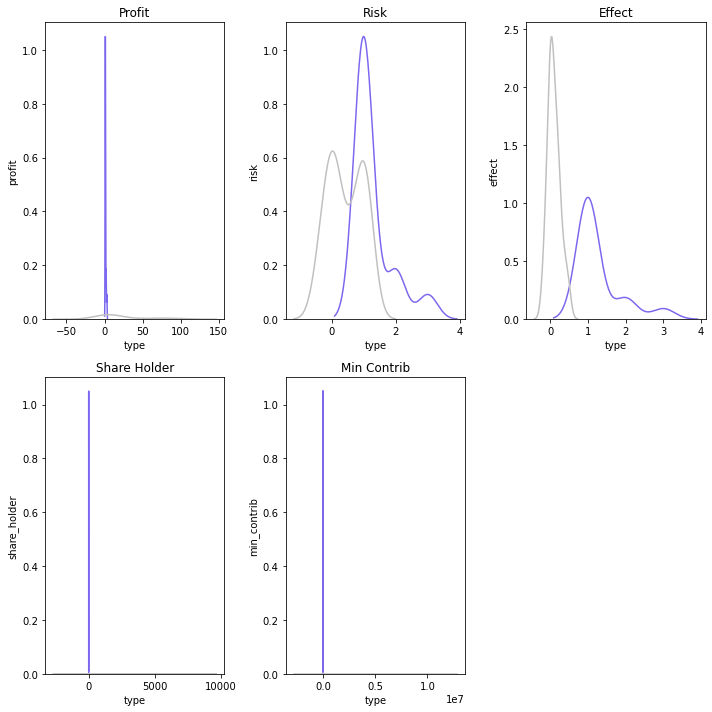

In [24]:
plot_kde_plots(df)

In [25]:
df

,ID,type,profit,risk,effect,share_holder,min_contrib
0,11,1,6.22,1.035,-0.120,265,1000
1,2,2,12.45,0.190,0.330,275,100000
2,3,2,3.52,-0.007,0.482,142,300000
3,4,2,0.38,0.776,0.046,80,10000000
4,5,2,1.77,1.084,0.007,141,300000
5,12,1,-2.54,0.042,-0.117,1,50000
6,6,3,81.40,0.699,0.001,6976,1000
7,7,3,2.93,1.002,0.132,6887,1000
10,13,1,-0.72,0.093,-0.068,44,1000
11,14,1,2.37,0.031,0.035,534,1000


Шкалирование - Нормализация

In [26]:
ids = df['ID'].values
df_to_scale = df.drop(columns=['ID'])
col_names = list(df_to_scale)

In [27]:
ids

array([11,  2,  3,  4,  5, 12,  6,  7, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 24, 25, 26, 27, 10, 28, 29, 30, 31, 33, 34], dtype=int64)

In [28]:
norm_scaler = preprocessing.MinMaxScaler()
norm_scaler.fit(df_to_scale)
norm = norm_scaler.transform(df_to_scale)

In [29]:
df_norm = pd.DataFrame(data = norm, columns = col_names)
df_norm.head()

,type,profit,risk,effect,share_holder,min_contrib
0,0.0,0.216336,0.902314,0.078101,0.037849,0.000000
1,0.5,0.269231,0.359254,0.767228,0.039283,0.009901
2,0.5,0.193411,0.232648,1.000000,0.020215,0.029903
3,0.5,0.166752,0.735861,0.332312,0.011326,1.000000
4,0.5,0.178553,0.933805,0.272588,0.020072,0.029903


In [30]:
df_norm['ID'] = ids.astype(int)

In [31]:
display(df_norm)

,type,profit,risk,effect,share_holder,min_contrib,ID
0,0.0,0.216336,0.902314,0.078101,0.037849,0.000000,11
1,0.5,0.269231,0.359254,0.767228,0.039283,0.009901,2
2,0.5,0.193411,0.232648,1.000000,0.020215,0.029903,3
3,0.5,0.166752,0.735861,0.332312,0.011326,1.000000,4
4,0.5,0.178553,0.933805,0.272588,0.020072,0.029903,5
5,0.0,0.141960,0.264139,0.082695,0.000000,0.004900,12
6,1.0,0.854644,0.686375,0.263400,1.000000,0.000000,6
7,1.0,0.188402,0.881105,0.464012,0.987240,0.000000,7
8,0.0,0.157412,0.296915,0.157734,0.006165,0.000000,13
9,0.0,0.183647,0.257069,0.315467,0.076416,0.000000,14


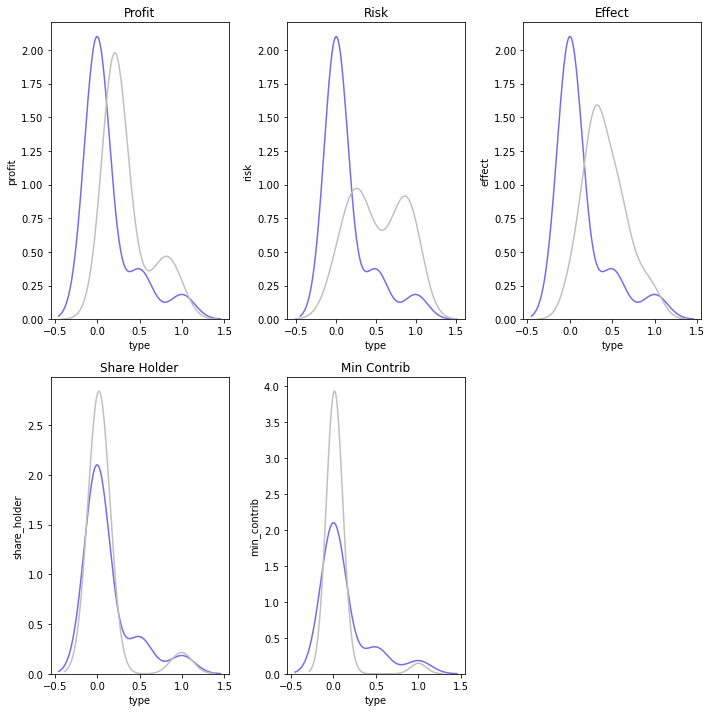

In [32]:
plot_kde_plots(df_norm)

Шкалирование - Стандартизация

In [34]:
s_scaler = preprocessing.StandardScaler()
stand = s_scaler.fit_transform(df_to_scale)

In [35]:
df_stand = pd.DataFrame(stand, columns = col_names)
df_stand.head()

,type,profit,risk,effect,share_holder,min_contrib
0,-0.474713,-0.482752,1.153312,-1.414225,-0.209172,-0.265352
1,1.246121,-0.281169,-0.482973,1.447114,-0.203374,-0.210920
2,1.246121,-0.570116,-0.864450,2.413610,-0.280488,-0.100957
3,1.246121,-0.671716,0.651776,-0.358709,-0.316437,5.232248
4,1.246121,-0.626740,1.248198,-0.606691,-0.281068,-0.100957


In [36]:
df_stand['ID'] = ids.astype(int)

In [37]:
df_stand

,type,profit,risk,effect,share_holder,min_contrib,ID
0,-0.474713,-0.482752,1.153312,-1.414225,-0.209172,-0.265352,11
1,1.246121,-0.281169,-0.482973,1.447114,-0.203374,-0.210920,2
2,1.246121,-0.570116,-0.864450,2.413610,-0.280488,-0.100957,3
3,1.246121,-0.671716,0.651776,-0.358709,-0.316437,5.232248,4
4,1.246121,-0.626740,1.248198,-0.606691,-0.281068,-0.100957,5
5,-0.474713,-0.766198,-0.769565,-1.395149,-0.362242,-0.238411,12
6,2.966954,1.949832,0.502671,-0.644843,3.681938,-0.265352,6
7,2.966954,-0.589206,1.089410,0.188125,3.630335,-0.265352,7
8,-0.474713,-0.707308,-0.670807,-1.083581,-0.337310,-0.265352,13
9,-0.474713,-0.607326,-0.790866,-0.428653,-0.053203,-0.265352,14


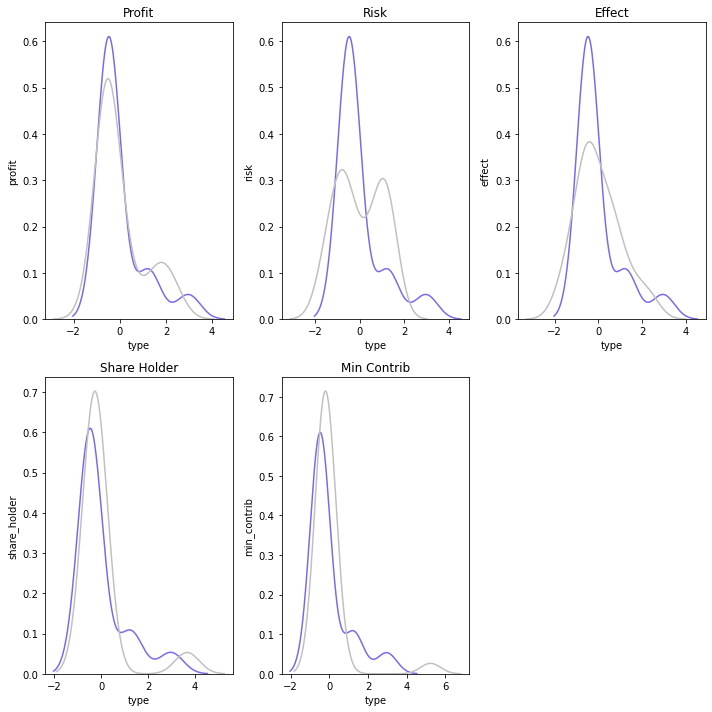

In [38]:
plot_kde_plots(df_stand)

Из графиков видно, что стандартизация лучше подходит для финансовых данных

Поиск оптимальных решений

In [39]:
def inverse(value):
        return value / -1

In [40]:
df_stand['risk'] = df_stand['risk'].apply(inverse)
df_stand['min_contrib'] = df_stand['min_contrib'].apply(inverse)

In [41]:
selected_columns = ['profit', 'risk', 'effect', 'share_holder', 'min_contrib']

In [42]:
df_stand['select'] = df_stand[selected_columns].mean(axis=1)

In [43]:
df_stand

,type,profit,risk,effect,share_holder,min_contrib,ID,select
0,-0.474713,-0.482752,-1.153312,-1.414225,-0.209172,0.265352,11,-0.598822
1,1.246121,-0.281169,0.482973,1.447114,-0.203374,0.210920,2,0.331293
2,1.246121,-0.570116,0.864450,2.413610,-0.280488,0.100957,3,0.505683
3,1.246121,-0.671716,-0.651776,-0.358709,-0.316437,-5.232248,4,-1.446177
4,1.246121,-0.626740,-1.248198,-0.606691,-0.281068,0.100957,5,-0.532348
5,-0.474713,-0.766198,0.769565,-1.395149,-0.362242,0.238411,12,-0.303123
6,2.966954,1.949832,-0.502671,-0.644843,3.681938,0.265352,6,0.949922
7,2.966954,-0.589206,-1.089410,0.188125,3.630335,0.265352,7,0.481039
8,-0.474713,-0.707308,0.670807,-1.083581,-0.337310,0.265352,13,-0.238408
9,-0.474713,-0.607326,0.790866,-0.428653,-0.053203,0.265352,14,-0.006593


In [45]:
top_5_ids = df_stand.nlargest(5, 'select')['ID']

filtered_data = df_copy[df_copy['ID'].isin(top_5_ids.values)]
print('Топ-5 инструментов - Шкалирование:')
display(filtered_data)

Топ-5 инструментов - Шкалирование:


,ID,name,type,profit,risk,effect,share_holder,min_contrib
2,3,Активо двенадцать,Закрытый,3.52,-0.007,0.482,142,300000
6,6,Альфа-Капитал Видеоигры,Биржевой,81.40,0.699,0.001,6976,1000
18,21,ДОХОДЪ. Российские акции. Первый эшелон,Открытый,98.52,-0.298,0.177,174,1000
21,24,Лидер - Акции,Открытый,65.12,-0.050,0.235,96,500000
24,27,Мои акции,Открытый,83.40,0.930,0.434,257,5000
